## Basic Intro

In [3]:
import networkx as nx
import dgl
import torch as th
import numpy as np
import scipy.sparse as spp

In [2]:
u = th.tensor([0,0,0,0,0]) #起始节点
v = th.tensor([1,2,3,4,5]) #终止节点
star = dgl.graph((u,v))
# nx.draw(star.to_networkx(), with_labels=True) #可视化
# plt.show()

In [11]:
star

Graph(num_nodes=6, num_edges=5,
      ndata_schemes={}
      edata_schemes={})

In [9]:
g = dgl.graph((u, v), num_nodes=8)

In [14]:
import dgl
import torch as th
g = dgl.graph(([0, 0, 1, 5], [1, 2, 2, 0])) # 6个节点，4条边
g
g.ndata['x'] = th.ones(g.num_nodes(), 3)               # 长度为3的节点特征
g.edata['x'] = th.ones(g.num_edges(), dtype=th.int32)  # 标量整型特征
g
# 不同名称的特征可以具有不同形状
g.ndata['y'] = th.randn(g.num_nodes(), 5)
g.ndata['x'][1]                  # 获取节点1的特征
g.edata['x'][th.tensor([0, 3])]  # 获取边0和3的特征

g


Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})

In [18]:
# 获取节点特征
node_x = g.ndata['x']  # shape: (6, 3)
node_y = g.ndata['y']  # shape: (6, 5)

# 获取边特征
edge_x = g.edata['x']  # shape: (4,)

num_nodes = g.num_nodes  # 6
num_edges = g.num_edges  # 4

print(node_x)
print(node_y)
print(edge_x)
print(num_nodes)
print(num_edges)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[-1.1459,  0.8054, -0.7788, -0.3374, -0.7242],
        [-0.1109,  0.6838,  1.1884, -0.7687, -0.8536],
        [ 0.8129,  0.8831, -0.1214, -1.0942, -0.8556],
        [ 1.5978,  0.5363, -0.1955, -0.4647,  0.1012],
        [ 0.5130,  0.5020,  0.2081,  0.5550,  0.2823],
        [ 0.7166,  1.6365,  0.1661,  0.2622,  1.2333]])
tensor([1, 1, 1, 1], dtype=torch.int32)
<bound method DGLGraph.num_nodes of Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})>
<bound method DGLGraph.num_edges of Graph(num_nodes=6, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(3,), dtype=torch.float32), 'y': Scheme(shape=(5,), dtype=torch.float32)}
      edata_schemes={'x': Scheme(shape=(), dtype=torch.int32)})>


## 1.构建图

In [1]:
import pandas as pd

nodes_data = pd.read_csv('E:/Dataset/club/nodes.csv')
print(nodes_data)

    Id     Club  Age
0    0   Mr. Hi   45
1    1   Mr. Hi   33
2    2   Mr. Hi   36
3    3   Mr. Hi   31
4    4   Mr. Hi   41
5    5   Mr. Hi   42
6    6   Mr. Hi   48
7    7   Mr. Hi   41
8    8   Mr. Hi   30
9    9  Officer   35
10  10   Mr. Hi   38
11  11   Mr. Hi   44
12  12   Mr. Hi   37
13  13   Mr. Hi   39
14  14  Officer   36
15  15  Officer   38
16  16   Mr. Hi   47
17  17   Mr. Hi   45
18  18  Officer   41
19  19   Mr. Hi   31
20  20  Officer   31
21  21   Mr. Hi   44
22  22  Officer   42
23  23  Officer   32
24  24  Officer   30
25  25  Officer   50
26  26  Officer   30
27  27  Officer   43
28  28  Officer   48
29  29  Officer   40
30  30  Officer   39
31  31  Officer   45
32  32  Officer   47
33  33  Officer   33


In [2]:
edge_data = pd.read_csv('E:/Dataset/club/edges.csv')
print(edge_data)

     Src  Dst    Weight
0      0    1  0.318451
1      0    2  0.551215
2      0    3  0.227416
3      0    4  0.266919
4      0    5  0.475449
..   ...  ...       ...
151   33   28  0.266479
152   33   29  0.279901
153   33   30  0.652154
154   33   31  0.828536
155   33   32  0.842656

[156 rows x 3 columns]


In [4]:
import dgl

src = edge_data['Src'].to_numpy()
dst = edge_data['Dst'].to_numpy()

g = dgl.graph((src, dst))
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={}
      edata_schemes={})


In [5]:
print('#Nodes', g.number_of_nodes())
print('#Edges', g.number_of_edges())

#Nodes 34
#Edges 156


In [6]:
g.in_degrees(0)

16

In [7]:
g.successors(0)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31])

## 2.加入节点和边特征

### 2.1添加节点特征

In [8]:
import torch
import torch.nn.functional as F

age = torch.tensor(nodes_data['Age'].to_numpy()).float() / 100
print(age)

tensor([0.4500, 0.3300, 0.3600, 0.3100, 0.4100, 0.4200, 0.4800, 0.4100, 0.3000,
        0.3500, 0.3800, 0.4400, 0.3700, 0.3900, 0.3600, 0.3800, 0.4700, 0.4500,
        0.4100, 0.3100, 0.3100, 0.4400, 0.4200, 0.3200, 0.3000, 0.5000, 0.3000,
        0.4300, 0.4800, 0.4000, 0.3900, 0.4500, 0.4700, 0.3300])


In [9]:
# Get the features of node 0 and 10
age[[0, 10]]

tensor([0.4500, 0.3800])

In [10]:
# Feed the features to graph
g.ndata['age'] = age
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'age': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={})


In [11]:
# 将club的俱乐部转化成onehot编码
club = nodes_data['Club'].to_list()
# Convert to categorical integer values with 0 for 'Mr. Hi', 1 for 'Officer'.
club = torch.tensor([c == 'Officer' for c in club]).long()
# We can also convert it to one-hot encoding.
club_onehot = F.one_hot(club)
# print(club_onehot)

# Use `g.ndata` like a normal dictionary
g.ndata.update({'club' : club, 'club_onehot' : club_onehot})
# Remove some features using del
# del g.ndata['age']

print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'age': Scheme(shape=(), dtype=torch.float32), 'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={})


In [12]:
del g.ndata['age']

### 2.2添加边特征

In [13]:
# Get edge features from the DataFrame and feed it to graph.
edge_weight = torch.tensor(edge_data['Weight'].to_numpy())
# Similarly, use `g.edata` for getting/setting edge features.
g.edata['weight'] = edge_weight
print(g)

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})


## 3.半监督GNN分类

In [15]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools

### 3.1节点嵌入（基于邻居的节点嵌入方法）

In [52]:
#它使用了nn.Embedding模块，将每个节点嵌入到一个大小为5的向量空间中。
#在基于邻居的节点嵌入方法中，每个节点嵌入向量是由其邻居节点的嵌入向量聚合而成的。

node_embed = nn.Embedding(g.number_of_nodes(), 5)  # Every node has an embedding of size 5.
inputs = node_embed.weight                         # Use the embedding weight as the node features.
nn.init.xavier_uniform_(inputs)
print(inputs)
print(g)

Parameter containing:
tensor([[ 0.1809,  0.1854,  0.0149,  0.0522,  0.0196],
        [-0.3102,  0.1887, -0.2572, -0.3316, -0.3519],
        [-0.3598, -0.2338, -0.2882, -0.0995, -0.0575],
        [ 0.3891,  0.3784, -0.2948, -0.2642,  0.1774],
        [ 0.2972, -0.3788, -0.2588,  0.0405, -0.2454],
        [-0.1879,  0.2291, -0.0814,  0.3284, -0.1613],
        [-0.0844, -0.1304, -0.2239, -0.1427,  0.0420],
        [ 0.3892,  0.1105,  0.2141, -0.1370, -0.0561],
        [ 0.1822, -0.0302, -0.3800,  0.1019, -0.1763],
        [ 0.3124, -0.3818, -0.3869, -0.1278,  0.1504],
        [-0.2903,  0.0663, -0.2690, -0.3306, -0.2572],
        [-0.3139,  0.3298,  0.1569, -0.3163,  0.1369],
        [-0.3065,  0.0253,  0.0361, -0.2870,  0.2179],
        [-0.0649, -0.2611,  0.2375, -0.3219, -0.1317],
        [ 0.2251,  0.1907,  0.1873, -0.1691,  0.0284],
        [-0.2929, -0.2537, -0.3147, -0.2802, -0.2851],
        [-0.3298,  0.3405, -0.3644, -0.0832, -0.1123],
        [-0.3908,  0.3477, -0.1810, -0.2103

In [54]:
# 对0和33这两个进行标注（意味着，仅仅通过这两个标签推测全图的信息）

labels = g.ndata['club']
labeled_nodes = [0, 33]
print('Labels', labels[labeled_nodes])

Labels tensor([0, 1])


### 3.2定义GraphSAGE模型

In [58]:
from dgl.nn import SAGEConv

# build a two-layer GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):      #in_feats表示输入特征的大小
        super(GraphSAGE, self).__init__()                    #h_feats表示隐藏层特征的大小
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')     #使用'mean'聚合函数来汇集邻居节点信息
        self.conv2 = SAGEConv(h_feats, num_classes, 'mean')  #num_classes表示输出层的大小
    
    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h
    
# Create the model with given dimensions 
# input layer dimension: 5, node embeddings
# hidden layer dimension: 16
# output layer dimension: 2, the two classes, 0 and 1
net = GraphSAGE(5, 16, 2)
net

GraphSAGE(
  (conv1): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_neigh): Linear(in_features=5, out_features=16, bias=False)
    (fc_self): Linear(in_features=5, out_features=16, bias=True)
  )
  (conv2): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_neigh): Linear(in_features=16, out_features=2, bias=False)
    (fc_self): Linear(in_features=16, out_features=2, bias=True)
  )
)

In [57]:
# set up loss and optimizer
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(net.parameters(), node_embed.parameters()), lr=0.01)

In [59]:
#training
all_logits = []
for e in range(100):
    # forward
    logits = net(g, inputs)
    
    # compute loss
    logp = F.log_softmax(logits, 1)
    loss = F.nll_loss(logp[labeled_nodes], labels[labeled_nodes])
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    all_logits.append(logits.detach())
    
    if e % 5 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

d:\anaconda3\envs\pytorch\lib\site-packages\dgl\backend\pytorch\tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


In epoch 0, loss: 0.8097347021102905
In epoch 5, loss: 0.6619991064071655
In epoch 10, loss: 0.5563797354698181
In epoch 15, loss: 0.47535955905914307
In epoch 20, loss: 0.41270139813423157
In epoch 25, loss: 0.3610784709453583
In epoch 30, loss: 0.3193345367908478
In epoch 35, loss: 0.28156977891921997
In epoch 40, loss: 0.2518762946128845
In epoch 45, loss: 0.2256263792514801
In epoch 50, loss: 0.20321260392665863
In epoch 55, loss: 0.18543002009391785
In epoch 60, loss: 0.1700575351715088
In epoch 65, loss: 0.15672242641448975
In epoch 70, loss: 0.14524030685424805
In epoch 75, loss: 0.13516612350940704
In epoch 80, loss: 0.126120463013649
In epoch 85, loss: 0.11809560656547546
In epoch 90, loss: 0.11104323714971542
In epoch 95, loss: 0.10490470379590988


In [60]:
#check results
pred = torch.argmax(logits, axis=1)
print('Accuracy', (pred == labels).sum().item() / len(pred))

Accuracy 0.6470588235294118


### 3.3可视化结果

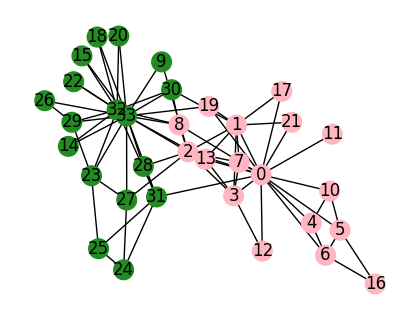

In [87]:
import networkx as nx
import matplotlib.pyplot as plt

nx_G = g.to_networkx()  #先把图转成network的格式
color_map = {0: '#FFB6C1', 1: '#228B22'} # Change these colors as desired
node_colors = [color_map[int(label)] for label in labels]
pos = nx.spring_layout(nx_G)

nx.draw(nx_G.to_undirected(), pos, with_labels=True, node_size=200, node_color=node_colors)  #把图转化成无向图
plt.show()


## 4.边预测GNN

In [88]:
#导入包
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp

In [18]:
g

Graph(num_nodes=34, num_edges=156,
      ndata_schemes={'club': Scheme(shape=(), dtype=torch.int64), 'club_onehot': Scheme(shape=(2,), dtype=torch.int64)}
      edata_schemes={'weight': Scheme(shape=(), dtype=torch.float64)})

In [16]:
#上传图并且进行图嵌入
node_embed = nn.Embedding(g.number_of_nodes(), 5)  # Every node has an embedding of size 5.
inputs = node_embed.weight                         # Use the embedding weight as the node features.
nn.init.xavier_uniform_(inputs)

Parameter containing:
tensor([[-0.2751, -0.3677, -0.0762, -0.3918, -0.0757],
        [-0.3230,  0.2058, -0.2826,  0.1728, -0.0031],
        [ 0.1256, -0.2076, -0.3496,  0.2333, -0.2130],
        [-0.0654, -0.0356,  0.3567, -0.1804,  0.2746],
        [-0.3021, -0.1642,  0.1115,  0.0403,  0.0955],
        [ 0.1200, -0.1472,  0.0123,  0.1603,  0.1684],
        [ 0.0901, -0.1334,  0.2803,  0.1413,  0.2903],
        [ 0.2819, -0.1118,  0.1986,  0.3592,  0.1793],
        [-0.1672,  0.0976,  0.3233, -0.0020, -0.1241],
        [-0.0913, -0.2779, -0.0029,  0.0709,  0.0971],
        [ 0.2479, -0.2981,  0.0556, -0.2549, -0.2907],
        [-0.3110, -0.1143,  0.2289, -0.2949, -0.3727],
        [ 0.1897,  0.1276,  0.0145,  0.1155, -0.0185],
        [ 0.0740, -0.2441, -0.1309, -0.2620,  0.3447],
        [ 0.2778,  0.1056, -0.1490,  0.0524, -0.3593],
        [ 0.3637, -0.1498,  0.2083,  0.2192,  0.0209],
        [ 0.3213,  0.3811,  0.0106, -0.2907,  0.1132],
        [-0.3111, -0.2698,  0.2997, -0.1631

### 4.1构建训练集和测试集

In [17]:
g.number_of_edges()

156

In [19]:
# Split edge set for training and testing
u, v = g.edges()
eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)
test_pos_u, test_pos_v = u[eids[:50]], v[eids[:50]]
train_pos_u, train_pos_v = u[eids[50:]], v[eids[50:]]

In [21]:
import scipy.sparse as sp
# Find all negative edges and split them for training and testing
adj = sp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))     #构建邻接矩阵
adj_neg = 1 - adj.todense() - np.eye(34)
neg_u, neg_v = np.where(adj_neg != 0)
neg_eids = np.random.choice(len(neg_u), 200)
test_neg_u, test_neg_v = neg_u[neg_eids[:50]], neg_v[neg_eids[:50]]
train_neg_u, train_neg_v = neg_u[neg_eids[50:]], neg_v[neg_eids[50:]]

In [23]:
# Create training set.
train_u = torch.cat([torch.as_tensor(train_pos_u), torch.as_tensor(train_neg_u)])
train_v = torch.cat([torch.as_tensor(train_pos_v), torch.as_tensor(train_neg_v)])
train_label = torch.cat([torch.zeros(len(train_pos_u)), torch.ones(len(train_neg_u))])

# Create testing set.
test_u = torch.cat([torch.as_tensor(test_pos_u), torch.as_tensor(test_neg_u)])
test_v = torch.cat([torch.as_tensor(test_pos_v), torch.as_tensor(test_neg_v)])
test_label = torch.cat([torch.zeros(len(test_pos_u)), torch.ones(len(test_neg_u))])

### 4.2定义GraphSAGE model

In [30]:
from dgl.nn import SAGEConv

# ----------- 2. create model -------------- #
# build a two-layer GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')
    
    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h
    
# Create the model with given dimensions 
# input layer dimension: 5, node embeddings
# hidden layer dimension: 16
net = GraphSAGE(5, 16)

In [31]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(net.parameters(), node_embed.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #
all_logits = []
for e in range(100):
    # forward
    logits = net(g, inputs)
    pred = torch.sigmoid((logits[train_u] * logits[train_v]).sum(dim=1))
    
    # compute loss
    loss = F.binary_cross_entropy(pred, train_label)
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    all_logits.append(logits.detach())
    
    if e % 5 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

d:\anaconda3\envs\pytorch\lib\site-packages\dgl\backend\pytorch\tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


In epoch 0, loss: 0.7305668592453003
In epoch 5, loss: 0.6323819756507874
In epoch 10, loss: 0.5396523475646973
In epoch 15, loss: 0.4425849914550781
In epoch 20, loss: 0.38629835844039917
In epoch 25, loss: 0.33923614025115967
In epoch 30, loss: 0.3004753589630127
In epoch 35, loss: 0.270256370306015
In epoch 40, loss: 0.23789355158805847
In epoch 45, loss: 0.19807720184326172
In epoch 50, loss: 0.15964919328689575
In epoch 55, loss: 0.11855847388505936
In epoch 60, loss: 0.08480344712734222
In epoch 65, loss: 0.059243153780698776
In epoch 70, loss: 0.03932385891675949
In epoch 75, loss: 0.025338852778077126
In epoch 80, loss: 0.01695336401462555
In epoch 85, loss: 0.011062148958444595
In epoch 90, loss: 0.00669007608667016
In epoch 95, loss: 0.0035549893509596586


In [32]:
# ----------- 5. check results ------------------------ #
pred = torch.sigmoid((logits[test_u] * logits[test_v]).sum(dim=1))
print('Accuracy', ((pred >= 0.5) == test_label).sum().item() / len(pred))

Accuracy 0.92
